### Imports

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading The Dataset

In [21]:
ds3 = pd.read_csv('../dataset3.csv')
ds3.replace('.', np.nan, inplace=True)
ds3 = ds3.drop(columns=['LINKS TO COMMENT LETTERS'])
ds3.head()

,COUNTY,HOSPITAL,ESOPHAGEAL RESECTION (Risk-Adjusted Mortality Rate),ESOPHAGEAL RESECTION (# of Deaths),ESOPHAGEAL RESECTION (# of Cases),ESOPHAGEAL RESECTION (Outlier Ratings),PANCREATIC RESECTION (Risk-Adjusted Mortality Rate),PANCREATIC RESECTION (# of Deaths),PANCREATIC RESECTION (# of Cases),PANCREATIC RESECTION (Outlier Ratings),...,PNEUMONIA (# of Cases),PNEUMONIA (Outlier Ratings),PCI (Risk-Adjusted Mortality Rate),PCI (# of Deaths),PCI (# of Cases),PCI (Outlier Ratings),CAROTID ENDARTERECTOMY (Risk-Adjusted Mortality Rate),CAROTID ENDARTERECTOMY (# of Deaths),CAROTID ENDARTERECTOMY (# of Cases),CAROTID ENDARTERECTOMY (Outlier Ratings)
0,Alameda,Alameda County Medical Center - Highland Campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,212,NaN,NaN,NaN,NaN,NaN,0,0,3,NaN
1,Alameda,Alameda Hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,150,NaN,NaN,NaN,NaN,NaN,0,0,3,NaN
2,Alameda,Alta Bates Summit Medical Center - Alta Bates ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,245,NaN,2.6,5,95,NaN,6.9,1,13,NaN
3,Alameda,Alta Bates Summit Medical Center - Summit Camp...,0,0,3,NaN,0,0,3,NaN,...,371,NaN,2.9,19,792,NaN,7.2,1,21,NaN
4,Alameda,Eden Medical Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,195,NaN,NaN,NaN,NaN,NaN,0,0,7,NaN


<Axes: >

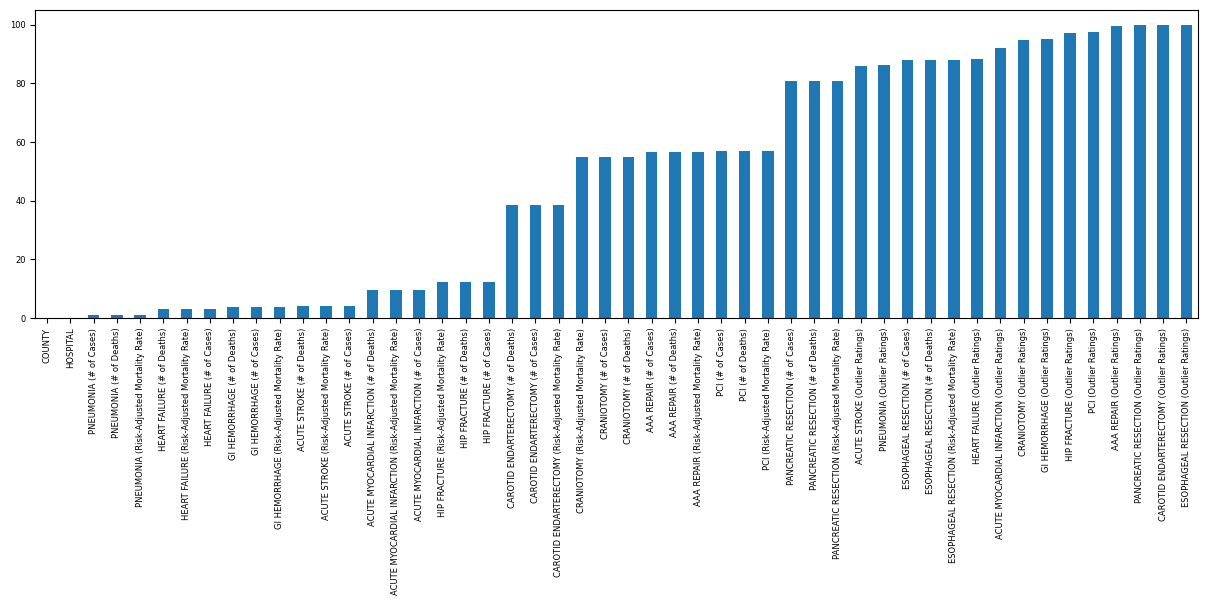

In [22]:
# sort the columns in ds3 by number of missing values
(ds3.isnull().sum() / len(ds3) * 100).sort_values().plot(kind='bar', figsize=(15, 4), fontsize=6)

In [23]:
# Analyzing missing values in the dataset
missing_values = ds3.isnull().sum()
percent_missing = (missing_values / len(ds3)) * 100

# Combining the counts and percentages into a DataFrame for better analysis
missing_data_analysis = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent Missing': percent_missing
}).sort_values(by='Percent Missing', ascending=False)

missing_data_analysis.head(10)  # Displaying the top 10 columns with the highest percentage of missing values

,Missing Values,Percent Missing
ESOPHAGEAL RESECTION (Outlier Ratings),331,100.000000
CAROTID ENDARTERECTOMY (Outlier Ratings),330,99.697885
PANCREATIC RESECTION (Outlier Ratings),330,99.697885
AAA REPAIR (Outlier Ratings),329,99.395770
PCI (Outlier Ratings),323,97.583082
HIP FRACTURE (Outlier Ratings),322,97.280967
GI HEMORRHAGE (Outlier Ratings),315,95.166163
CRANIOTOMY (Outlier Ratings),314,94.864048
ACUTE MYOCARDIAL INFARCTION (Outlier Ratings),305,92.145015
HEART FAILURE (Outlier Ratings),292,88.217523


### Converting Object Columns to Numeric Types If Possible

In [24]:
cols_that_cant_be_converted = []
for col in ds3.columns:
	if ds3[col].dtype != 'object':
		continue
	try:
		ds3[col] = pd.to_numeric(ds3[col])
	except ValueError:
		cols_that_cant_be_converted.append(col)

print("Number of columns that can't be converted to numeric", len(cols_that_cant_be_converted), "out of", len(ds3.columns))
ds3.dtypes

Number of columns that can't be converted to numeric 13 out of 50


COUNTY                                                         object
HOSPITAL                                                       object
ESOPHAGEAL RESECTION (Risk-Adjusted Mortality Rate)           float64
ESOPHAGEAL RESECTION (# of Deaths)                            float64
ESOPHAGEAL RESECTION (# of Cases)                             float64
ESOPHAGEAL RESECTION (Outlier Ratings)                        float64
PANCREATIC RESECTION (Risk-Adjusted Mortality Rate)           float64
PANCREATIC RESECTION (# of Deaths)                            float64
PANCREATIC RESECTION (# of Cases)                             float64
PANCREATIC RESECTION (Outlier Ratings)                         object
AAA REPAIR (Risk-Adjusted Mortality Rate)                     float64
AAA REPAIR (# of Deaths)                                      float64
AAA REPAIR (# of Cases)                                       float64
AAA REPAIR (Outlier Ratings)                                   object
CRANIOTOMY (Risk-Adj

### Converting Rest of Object Columns to Categorical Types

In [25]:
# for all the object columns, count the number of unique values
ds3.select_dtypes(include='object').nunique().sort_values().to_frame("No. unique values")

,No. unique values
PANCREATIC RESECTION (Outlier Ratings),1
AAA REPAIR (Outlier Ratings),1
CAROTID ENDARTERECTOMY (Outlier Ratings),1
CRANIOTOMY (Outlier Ratings),2
ACUTE MYOCARDIAL INFARCTION (Outlier Ratings),2
HEART FAILURE (Outlier Ratings),2
ACUTE STROKE (Outlier Ratings),2
GI HEMORRHAGE (Outlier Ratings),2
HIP FRACTURE (Outlier Ratings),2
PNEUMONIA (Outlier Ratings),2


In [26]:
# convert all the object columns to categorical
for col in ds3.select_dtypes(include='object').columns:
	ds3[col] = ds3[col].fillna("Missing")
	ds3[col] = ds3[col].astype('category')

ds3.dtypes.to_frame("Data Type").astype(str).sort_values(by="Data Type")


,Data Type
COUNTY,category
PCI (Outlier Ratings),category
PNEUMONIA (Outlier Ratings),category
HIP FRACTURE (Outlier Ratings),category
GI HEMORRHAGE (Outlier Ratings),category
ACUTE STROKE (Outlier Ratings),category
HEART FAILURE (Outlier Ratings),category
ACUTE MYOCARDIAL INFARCTION (Outlier Ratings),category
CRANIOTOMY (Outlier Ratings),category
AAA REPAIR (Outlier Ratings),category


### Implementing KNN for Clustering

Because dataset3 is without labels, we need to implement an unsupervised algorithms to provide clusters on it

Therefore, we'll use KNN algorithm which is typically a supervised algorithm for this dataset in order to find clusters

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Impute missing values with mean (can also use 'median' or 'most_frequent')
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
ds3_imputed = imputer.fit_transform(ds3.select_dtypes(include=[np.number]))

scaler = StandardScaler()
ds3_scaled = scaler.fit_transform(ds3_imputed)

# Define the number of neighbors
k = 5

# Apply KNN
knn = NearestNeighbors(n_neighbors=k)
knn.fit(ds3_scaled)
distances, indices = knn.kneighbors(ds3_scaled)
clusters = indices[:, 0]

clusters

/Users/asafbaibekov/Desktop/Projects/InsideOut/env/lib/python3.12/site-packages/sklearn/impute/_base.py:565: UserWarning: Skipping features without any observed values: ['ESOPHAGEAL RESECTION (Outlier Ratings)']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36, 169,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

So far it looks like the KNN for unsupervised was a fail because there are 331 rows in the dataset and the algorithm tells that there 331 different clusters